# Project Description

I did research on all retail properties in Pacfic Beach, San Diego. I narrowed them down to only include ones with a recorded previous sale price and made sure that they were at the minimum class B. So it includes class A and B properties. 
The class is the condition of property it goes from class A the highest to F the lowest. 
I later further narrowed down the properties to only show the ones with a return and displayed percent change and future sale price along with 5 key metrics and their future prices. I did a lot of research and provided relevant date for any investor below where all properties are listed.

## Project Code

If it makes sense for your project, you can have code and outputs here in the notebook as well.

In [1]:
import pandas as pd
import seaborn as snn
df = pd.read_excel('Only Metrics for price prediction model.xlsx')

pd.set_option('display.max_rows', None)

df

,Last Sale Price,Cap Rate,Property Size in Acres,Buildable Sqft,Potential Units,replacement cost,Noi
0,4000000,0.063000,2.30,117122,2,79642960,2.520000e+05
1,8910000,0.085000,0.36,30965,9,21056200,7.573500e+05
2,7750000,0.077500,0.86,18622,3,12662960,6.006250e+05
3,3400000,0.148041,0.86,42282,6,28751760,5.033400e+05
4,15500000,0.085900,1.78,56204,4,38218720,1.331450e+06
5,1150000,0.076000,0.36,7645,6,5198600,8.740000e+04
6,4213923,0.095000,0.63,9866,5,6708880,4.003227e+05
7,1150000,0.075000,0.23,5190,4,3529200,8.625000e+04
8,1250000,0.050000,0.01,3750,1,2550000,6.250000e+04
9,3025000,0.030000,0.15,5476,1,3723680,9.075000e+04


In [2]:
# with the columns named as 'Last Sale Price', 'Property Size in Acres', 
# 'Buildable Sqft', 'potential units', 'replacement cost'
# im applying all the formulas to each property and than seeing what the price would be based on the 10 year treasury yield 
# after getting that Im gonna get the average percent change in 10 years and see what the average price change percent is after 10 years
# for Class A/B retail properties in Pacific Beach, San Diego CA

def dollar_per_sf(df):
    """
    Calculates the cost per square foot ($/SF) by dividing the 'Last Sale Price' by the 'Buildable Sqft'.

    Args:
        df (pandas.DataFrame): DataFrame containing the columns 'Last Sale Price' and 'Buildable Sqft'.

    Returns:
        pandas.DataFrame: The input DataFrame with an additional column '$/SF' representing the cost per square foot.
    """
    df['$/SF'] = df['Last Sale Price'] / df['Buildable Sqft']
    return df


def dollar_per_acre(df):
    """
    Calculates the cost per acre ($/Acre) by dividing the 'Last Sale Price' by the 'Property Size in Acres'.

    Args:
        df (pandas.DataFrame): DataFrame containing the columns 'Last Sale Price' and 'Property Size in Acres'.

    Returns:
        pandas.DataFrame: The input DataFrame with an additional column '$/Acre' representing the cost per acre.
    """
    df['$/Acre'] = df['Last Sale Price'] / df['Property Size in Acres']
    return df


def dollar_per_buildable_sf(df):
    """
    Calculates the cost per buildable square foot ($/buildable SF) by dividing the 'Last Sale Price' by the 'Buildable Sqft'.

    Args:
        df (pandas.DataFrame): DataFrame containing the columns 'Last Sale Price' and 'Buildable Sqft'.

    Returns:
        pandas.DataFrame: The input DataFrame with an additional column '$/buildable SF' representing the cost per buildable square foot.
    """
    df['$/buildable SF'] = df['Last Sale Price'] / df['Buildable Sqft']
    return df


def dollar_per_buildable_unit(df):
    """
    Calculates the cost per buildable unit ($/buildable unit) by dividing the 'Last Sale Price' by the 'Potential Units'.

    Args:
        df (pandas.DataFrame): DataFrame containing the columns 'Last Sale Price' and 'Potential Units'.

    Returns:
        pandas.DataFrame: The input DataFrame with an additional column '$/buildable unit' representing the cost per buildable unit.
    """
    df['$/buildable unit'] = df['Last Sale Price'] / df[' Potential Units ']
    return df


def delta_from_replacement_costs(df):
    """
    Calculates the difference between the 'Last Sale Price' and the 'replacement cost' (Delta from replacement costs).

    Args:
        df (pandas.DataFrame): DataFrame containing the columns 'Last Sale Price' and 'replacement cost'.

    Returns:
        pandas.DataFrame: The input DataFrame with an additional column 'Delta from replacement costs' representing the difference between the last sale price and replacement cost.
    """
    df['Delta from replacement costs'] = df['Last Sale Price'] - df['replacement cost ']
    return df

In [3]:
import pandas as pd
#loading data in 
df = pd.read_excel('Only Metrics for price prediction model.xlsx')

# Apply the functions
df = dollar_per_sf(df)
df = dollar_per_acre(df)
df = dollar_per_buildable_sf(df)
df = dollar_per_buildable_unit(df)
df = delta_from_replacement_costs(df)
df['Adjusted Cap Rate'] = df['Cap Rate '] - 0.0373
df['Future Price'] = df['Noi'] / df['Adjusted Cap Rate']
df['Percent Change'] = ((df['Future Price'] - df['Last Sale Price']) / df['Last Sale Price']) * 100

# Now df will have the results of applying each function


In [4]:
df

,Last Sale Price,Cap Rate,Property Size in Acres,Buildable Sqft,Potential Units,replacement cost,Noi,$/SF,$/Acre,$/buildable SF,$/buildable unit,Delta from replacement costs,Adjusted Cap Rate,Future Price,Percent Change
0,4000000,0.063000,2.30,117122,2,79642960,2.520000e+05,34.152422,1.739130e+06,34.152422,2.000000e+06,-75642960,0.025700,9.805447e+06,145.136187
1,8910000,0.085000,0.36,30965,9,21056200,7.573500e+05,287.744227,2.475000e+07,287.744227,9.900000e+05,-12146200,0.047700,1.587736e+07,78.197065
2,7750000,0.077500,0.86,18622,3,12662960,6.006250e+05,416.174417,9.011628e+06,416.174417,2.583333e+06,-4912960,0.040200,1.494092e+07,92.786070
3,3400000,0.148041,0.86,42282,6,28751760,5.033400e+05,80.412469,3.953488e+06,80.412469,5.666667e+05,-25351760,0.110741,4.545193e+06,33.682142
4,15500000,0.085900,1.78,56204,4,38218720,1.331450e+06,275.781083,8.707865e+06,275.781083,3.875000e+06,-22718720,0.048600,2.739609e+07,76.748971
5,1150000,0.076000,0.36,7645,6,5198600,8.740000e+04,150.425114,3.194444e+06,150.425114,1.916667e+05,-4048600,0.038700,2.258398e+06,96.382429
6,4213923,0.095000,0.63,9866,5,6708880,4.003227e+05,427.115650,6.688767e+06,427.115650,8.427846e+05,-2494957,0.057700,6.938001e+06,64.644714
7,1150000,0.075000,0.23,5190,4,3529200,8.625000e+04,221.579961,5.000000e+06,221.579961,2.875000e+05,-2379200,0.037700,2.287798e+06,98.938992
8,1250000,0.050000,0.01,3750,1,2550000,6.250000e+04,333.333333,1.250000e+08,333.333333,1.250000e+06,-1300000,0.012700,4.921260e+06,293.700787
9,3025000,0.030000,0.15,5476,1,3723680,9.075000e+04,552.410519,2.016667e+07,552.410519,3.025000e+06,-698680,-0.007300,-1.243151e+07,-510.958904


In [5]:
df_last_price = df['Last Sale Price'][(df['Percent Change'] > 0) & (df['Last Sale Price'] > 0)]
df_future_price = df['Future Price'][(df['Percent Change'] > 0) & (df['Future Price'] > 0)]
df_percent_change = df['Percent Change'][df['Percent Change'] > 0]
df_price_changes = pd.DataFrame({
    'Last Sale Price': df_last_price.map('${:,.2f}'.format),
    'Future Price': df_future_price.map('${:,.2f}'.format),
    'Percent Change': df_percent_change.map('{:,.2f}%'.format)
})

print(df_price_changes)
average_percent_change = df_percent_change.mean()
print("Average Percent Change: {:.2f}%".format(average_percent_change))


#For readability Im showing the percent change of all properties that grew over a 10 year period
#These 13 Properties are the ones that showed significant growth over a 10 year period 
# There will be more details about these properties below where all properties will be listed 


   Last Sale Price     Future Price Percent Change
0    $4,000,000.00    $9,805,447.47        145.14%
1    $8,910,000.00   $15,877,358.49         78.20%
2    $7,750,000.00   $14,940,920.40         92.79%
3    $3,400,000.00    $4,545,192.82         33.68%
4   $15,500,000.00   $27,396,090.53         76.75%
5    $1,150,000.00    $2,258,397.93         96.38%
6    $4,213,923.00    $6,938,001.47         64.64%
7    $1,150,000.00    $2,287,798.41         98.94%
8    $1,250,000.00    $4,921,259.84        293.70%
10   $3,051,304.00    $8,887,900.88        191.28%
12   $5,350,000.00  $105,127,500.00      1,865.00%
13     $600,000.00      $907,840.44         51.31%
Average Percent Change: 257.32%


In [6]:
import numpy as np

geometric_mean = np.power(1 + average_percent_change.mean(), 1/10) - 1

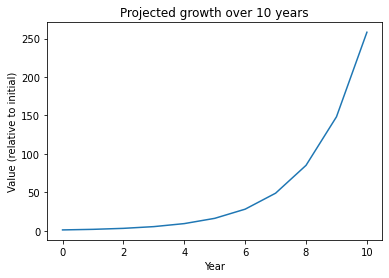

In [7]:
# This just shows how much it would need to average to hit that target 250% percent growth over a 10 year period 
import matplotlib.pyplot as plt


years = list(range(11))  

# Calculating  the projected value each year, starting with 1.0 (representing the initial price)
projected_values = [(1 + geometric_mean) ** year for year in years]

plt.plot(years, projected_values)
plt.title('Projected growth over 10 years')
plt.xlabel('Year')
plt.ylabel('Value (relative to initial)')
plt.show()
# this Plot is the average percent change between last sale price and future sale price difference of all 13 properties 
# that showed promise 
# the total average expected Growth is 250% in 10 years

In [8]:
#this is my data for all the properties with key metrics, these are numbered so it can be easily cross referenced to the
#properties I chose
import pandas as pd

df2 = pd.read_excel('Price Prediction properties info.xlsx')

pd.set_option('display.max_rows', None)

df2

,Property Address,Property Name,PropertyType,Building Class,Building Status,RBA,Unnamed: 6,Rent/SF/Yr,Secondary Type,Market Name,...,Year Built,Last Sale Date,Last Sale Price,Cap Rate,Property Size in Acres,Buildable Sqft,Potential Units,replacement cost,Noi,Unnamed: 30
0,4110-4190 Mission Blvd,Pacific Beach Promenade,Retail (Neighborhood Center),B,Existing,117122,NaN,$30.00 - 35.40,NaN,San Diego,...,1986,1994-08-19,4000000,0.063000,2.30,117122,2,79642960,2.520000e+05,4110-4190 Mission Blvd
1,4475 Mission Blvd,Bldg 1,Retail (Strip Center),B,Existing,30965,NaN,$27.00 - 54.48,Storefront,San Diego,...,1960,2003-10-31,8910000,0.085000,0.36,30965,9,21056200,7.573500e+05,4475 Mission Blvd
2,910 Grand Ave,Grand Central,Retail,B,Existing,18622,NaN,$26.64,Storefront Retail/Office,San Diego,...,1987,2021-06-24,7750000,0.077500,0.86,18622,3,12662960,6.006250e+05,910 Grand Ave
3,909-919 Garnet Ave,Pacific Beach Building,Retail (Neighborhood Center),B,Existing,42282,NaN,$41.15 - 50.30 (Est.),Storefront Retail/Office,San Diego,...,1953,1998-11-09,3400000,0.148041,0.86,42282,6,28751760,5.033400e+05,909-919 Garnet Ave
4,4303-4343 Mission Blvd,Pacific Beach Marketplace,Retail (Neighborhood Center),B,Existing,56204,NaN,$51.26 - 62.65 (Est.),NaN,San Diego,...,1995,1996-06-27,15500000,0.085900,1.78,56204,4,38218720,1.331450e+06,4303-4343 Mission Blvd
5,2015 Garnet Ave,Garnet Center,Retail (Strip Center),B,Existing,7645,NaN,$48.23 - 58.95 (Est.),NaN,San Diego,...,1988,2003-10-15,1150000,0.076000,0.36,7645,6,5198600,8.740000e+04,2015 Garnet Ave
6,1945-1975 Garnet Ave,NaN,Retail (Strip Center),B,Existing,9866,NaN,$33.66 - 41.14 (Est.),Storefront,San Diego,...,1972,1998-10-16,4213923,0.095000,0.63,9866,5,6708880,4.003227e+05,1945-1975 Garnet Ave
7,4283-4287 Mission Blvd,NaN,Retail,B,Existing,5190,NaN,$39.01 - 47.68 (Est.),Freestanding,San Diego,...,2004,2007-02-05,1150000,0.075000,0.23,5190,4,3529200,8.625000e+04,4283-4287 Mission Blvd
8,2002 Garnet Ave,Valvoline Instant Oil Change,Retail,B,Existing,3750,NaN,$39.59 - 48.39 (Est.),Auto Repair,San Diego,...,1991,2007-03-13,1250000,0.050000,0.01,3750,1,2550000,6.250000e+04,2002 Garnet Ave
9,4437-4445 Lamont St,Patio on Lamont,Retail,B,Existing,5476,NaN,$38.68 - 47.27 (Est.),Restaurant,San Diego,...,1960,2021-10-01,3025000,0.030000,0.15,5476,1,3723680,9.075000e+04,4437-4445 Lamont St


# Tests

In [9]:
import pandas as pd

# Test for dollar_per_sf function
def test_dollar_per_sf():
    # Create test DataFrame
    test_df = pd.DataFrame({
        'Last Sale Price': [100000, 150000, 200000],
        'Buildable Sqft': [1000, 1500, 1800]
    })

    # Execute function
    df = dollar_per_sf(test_df)

    # Assert statements to test function
    assert callable(dollar_per_sf)
    assert '$/SF' in df.columns
    assert df['$/SF'].tolist() == [100, 100, 111.11111111111111]

# Test for dollar_per_acre function
def test_dollar_per_acre():
    # Create test DataFrame
    test_df = pd.DataFrame({
        'Last Sale Price': [100000, 150000, 200000],
        'Property Size in Acres': [1, 2, 3]
    })

    # Execute function
    df = dollar_per_acre(test_df)

    # Assert statements to test function
    assert callable(dollar_per_acre)
    assert '$/Acre' in df.columns
    assert df['$/Acre'].tolist() == [100000, 75000, 66666.66666666667]

# Test for dollar_per_buildable_sf function
def test_dollar_per_buildable_sf():
    # Create test DataFrame
    test_df = pd.DataFrame({
        'Last Sale Price': [100000, 150000, 200000],
        'Buildable Sqft': [1000, 1500, 1800]
    })

    # Execute function
    df = dollar_per_buildable_sf(test_df)

    # Assert statements to test function
    assert callable(dollar_per_buildable_sf)
    assert '$/buildable SF' in df.columns
    assert df['$/buildable SF'].tolist() == [100, 100, 111.11111111111111]

# Test for dollar_per_buildable_unit function
def test_dollar_per_buildable_unit():
    # Create test DataFrame
    test_df = pd.DataFrame({
        'Last Sale Price': [100000, 150000, 200000],
        ' Potential Units ': [10, 15, 20]
    })

    # Execute function
    df = dollar_per_buildable_unit(test_df)

    # Assert statements to test function
    assert callable(dollar_per_buildable_unit)
    assert '$/buildable unit' in df.columns
    assert df['$/buildable unit'].tolist() == [10000, 10000, 10000]

# Test for delta_from_replacement_costs function
def test_delta_from_replacement_costs():
    # Create test DataFrame
    test_df = pd.DataFrame({
        'Last Sale Price': [100000, 150000, 200000],
        'replacement cost ': [80000, 120000, 180000]
    })

    # Execute function
    df = delta_from_replacement_costs(test_df)

    # Assert statements to test function
    assert callable(delta_from_replacement_costs)
    assert 'Delta from replacement costs' in df.columns
    assert df['Delta from replacement costs'].tolist() == [20000, 30000, 20000]



In [10]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.9.5, pytest-7.2.2, pluggy-1.0.0
rootdir: /home/vpashayan/Final_Project_COGS18_SP23
plugins: anyio-3.2.1
collected 5 items                                                              

test_functions.py .....                                                  [100%]

============================== 5 passed in 0.74s ===============================


#### Extra Credit (*optional*)

Replace all of this text with a brief explanation (~3 sentences) of: 
1. My python background is none, this is the first coding class ive taken. My major is real estate development so this class was very new and difficult at first but im glad I did it. It was taken to be competitive in the changing real estate market with more data analytics coming into the field. 

2. I think I did my best with the knowledge I had, at times I definetley thought this project I chose was gonna be to hard for me to do and had to adjust from my initial machine learning platform (I know Im crazy) to a more analytical finacial model. But either way it was sitll hard. 